<a href="https://colab.research.google.com/github/anapessoapcrj/utilitiesCenso2022/blob/main/MVP_Servi%C3%A7o_Essenciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.  **Apresentação e Justificativa**

<p align = "justify">Conhecer a realidade geográfica brasileira é essencial para diversas áreas de atuação. Para o setor público, isso permite uma gestão mais eficiente dos recursos e uma melhor resposta às necessidades da população em diferentes regiões. No setor privado, o conhecimento territorial pode otimizar a logística, a distribuição de produtos e a expansão de serviços. Para os cidadãos promove uma consciência sobre a estrutura e o funcionamento do Estado, fortalecendo o exercício dos direitos e deveres civis. Portanto, a familiaridade com o espaço geográfico, especialmente os municípios, não apenas impulsiona o desenvolvimento econômico e social, mas também é um pilar para a construção de uma sociedade mais informada e participativa.

<p align = "justify">Alinhado com a visão acima foi decidido usar conjuntos de dados do último Censo, em 2022, pelo Instituto Brasileiro de Geografia e Estatística, o IBGE. Dentre as diversos assuntos disponíveis, foram selecionados datasets relacionado a serviços básicos e essenciais para a população¹: coleta de lixo, esgotamento sanitário e canalização e rede de distribuição de água.  Estes conjuntos de dados não são rotulados, portanto para eventual uso para treinamento de Machine ou Deep Learning deve ser feito através de aprendizagem não supervisionada, onde se buscá-se-a associação entre os serviços.  Para este trabalho será verificado se é possível perceber similiradade entre o percentual de pessoas atendidas por cada um destes serviços nos municípios.  Outro ação neste projeto é verificar, agrupando os municípios por Estados, como está a distribuição de acesso desses serviços, identificando padrões por Regiões Geográficas.  

<p align = "justify">Um aspecto importante, considerado para o desenvolvimento do trabalho, é que o Brasil é um país com muitos municípios com baixa densidade demográfica.  Para estes casos, seria necessário levantar outras variáveis ligadas a domínios como a de meio ambiente, logística de transporte, atividade econômico predominante, entre outros, o que não será o caso para este estudo.  Por isso, com auxílio do dataset de densidade demográfica, foram excluídos munícipios com esparsa distribuição de populacional (abaixo ou igual a 50 pessoas por km²).

¹ A população será moradores em domicílio particular permanente ocupado nos municípios brasileiros.

<p align = "justify">Estes dados foram extraídos¹ do portal público brasileiro de dados geoespaciais que é denominado <a href="https://inde.gov.br">Infraestrutura de Dados Espaciais - INDE</a> na <a href="https://visualizador.inde.gov.br">sessão de visualizador de mapas</a>.  <a href="https://github.com/anapessoapcrj/utilitiesCenso2022/blob/main/Screenshot%202024-09-15%20170318.png">¹Clique para ver exemplo download</a>.

<p align = "justify">Para saber mais sobre os conjuntos de dados que serão aproveitados neste MVP, segue os links abaixos de seus respectivos metadados:

* <a href="https://metadados.inde.gov.br/geonetwork/srv/api/records/f98f8c9b-6296-45e5-b350-d55eebb428f7/formatters/xsl-view?output=pdf&language=por&approved=true">Coleta de lixo</a>;

* <a href="https://metadados.inde.gov.br/geonetwork/srv/api/records/3d726bed-576a-4a71-8bb8-d39f5801d05c/formatters/xsl-view?output=pdf&language=por&approved=true">Esgotamento sanitário</a>;

* <a href="https://metadados.inde.gov.br/geonetwork/srv/api/records/e8f3f737-9579-47ab-93b4-0b7c9511af32/formatters/xsl-view?output=pdf&language=por&approved=true">Abastecimento de água</a>;

* <a href="https://metadados.inde.gov.br/geonetwork/srv/api/records/f6b6a7b8-80cf-480b-ab29-992dbe070196/formatters/xsl-view?output=pdf&language=por&approved=true">Canalização da Água</a>;

* <a href="https://metadados.inde.gov.br/geonetwork/srv/api/records/2a29969d-9d59-4d4c-9815-915b5a42fcc4/formatters/xsl-view?output=pdf&language=por&approved=true">Densidade Demográfica</a>.



# Reconhecimento dos Dataset

A seguir serão apresentado as colunas que serão efetivamente utilizadas no neste trabalho.  Caso seja necessário, é possível ver a descrição de todas as colunas dos datasets <a href="https://github.com/anapessoapcrj/MVP-Ciencia-de-Dados/blob/main/README.md">aqui</a>.

Colunas presentes em todos os dataframes:

* FID:  Chave primária de cada dataset;
* Geocodigo: código do município;
* Nome: nome do município;
* MoradDPPOTot ou MoradDPPOTotTot: Total de pessoas em **domicílios particulares permanente ocupados (DPPO)**.

 <p align="justify">Cabe ressaltar que cada campo (coluna) tem a sua correspondente em percentagem que é calculada em relação ao total de moradores em domicílios (DPPO). Estas se iniciam com "Perc" e segue com denominação da coluna com valores absolutos. Exemplo: MoradDPPOTotVala tem como correspondente em termos percentuais a PercMoradDPPOTotVala.
---
Dicionário das colunas densDemog:

* AreaUnidTerrit: Área em km² do município;
* DensDemog: Densidade Demográfica do município p/km²;
* PopResid: População residente do município.
---
Dicionário das colunas coletaLixoMun:

* MoradDPPOColetTot: Pessoas em domicílios (DPPO) que possui coleta de lixo direta ou indireta (em domícilio ou através do deposito em caçambas). Os valores refletem a soma da coluna MoradDPPOColetDomicServLimpTot com a MoradDPPODepCacambServLimpTot;

---
Dicionário colunas do Dataframe esgotamentoSanitario:

* MoradDPPOTotRedeGeralPluvFossaRede: Pessoas em domicílios (DPPO) com esgotamento sanitário ligado a rede geral ou pluvial ou fossa septica ligada à rede. Os valores apresentados representados nesta coluna representa a soma da MoradDPPOTotFossaSeptOuFiltroRede com a MoradDPPOTotRedeGeralPluv;
---
Dicionário colunas do Dataframe aguaCanalizada:

* MoradDPPOCanalizCasaTot: Pessoas em domicílios (DPPO) com água canalizada até interior da casa;
* MoradDPPOCanalizTerrTot: Pessoas em domicílios (DPPO) com água canalizada até o terreno

---
Dicionário colunas do Dataframe aguaRedeDistr:

* MoradDPPOTotRedeGeral: Pessoas em domicílios (DPPO) abastecidos principalmente com água da rede geral de distribuição.


# 2. **Importação de biblioteca e dos conjuntos de dados**

In [2]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
## Transformações Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importação dos arquivos csv
# Os arquivos foram baixados no site do Inde e estão no github anapessoa

url1 = "https://github.com/anapessoapcrj/Coleta_Lixo_Ibge/raw/main/sidra_9541_PercMoradDPPOColetTot_munic_22_pol%20(1).csv"

url2 = "https://github.com/anapessoapcrj/DensDemografica/raw/main/sidra_4714_DensDemog_HabKm2_munic_22_pol.csv"

url3 = "https://github.com/anapessoapcrj/EsgotamentoSanitarioCenso22/raw/main/sidra_9397_PercMoradDPPOTotRedeGeralPluvFossaRede_munic_22_pol.csv"

url4 = "https://github.com/anapessoapcrj/semAguaCanalizadaCenso22/raw/main/sidra_6909_PercMoradDPPOSemCanalizTot_munic_22_pol.csv"

url5 = "https://github.com/anapessoapcrj/aguaDistribuicaoCenso22/raw/main/sidra_6909_PercMoradDPPOTotRedeGeral_munic_22_pol%20(1).csv"

In [4]:
# Convertando os CSV em Dataframe

delimiter = "," # separador de colunas ","
coletaLixoMun = pd.read_csv(url1, delimiter=delimiter)
densDemog = pd.read_csv(url2, delimiter=delimiter)
esgotamentoSanitario = pd.read_csv(url3, delimiter=delimiter)
aguaCanalizada = pd.read_csv(url4, delimiter=delimiter)
aguaRedeDistr = pd.read_csv(url5, delimiter=delimiter)

## Visualizando informações dos dataframes - Dimensão, tipo de dado e identificação de valores nulos

Os datasets correspondem aos municípios brasileiros que são únicos e têm como chave primária o Geocódigo.  Serão vistos a seguir dimensão dos datasets, linhas x colunas, e em quais campos há valores nulos.

In [5]:
densDemog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FID             5570 non-null   object 
 1   Geocodigo       5570 non-null   int64  
 2   Nome            5570 non-null   object 
 3   AreaUnidTerrit  5570 non-null   float64
 4   DensDemog       5570 non-null   float64
 5   PopResid        5570 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 261.2+ KB


Em densDemog não há valores nulos

In [6]:
# Dimensão de densDemog (nº de linhas, nº de colunas)

densDemog.shape

(5570, 6)

In [7]:
coletaLixoMun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   FID                                 5570 non-null   object 
 1   Geocodigo                           5570 non-null   int64  
 2   Nome                                5570 non-null   object 
 3   MoradDPPOColetDomicServLimpTot      5570 non-null   int64  
 4   MoradDPPOColetTot                   5570 non-null   int64  
 5   MoradDPPODepCacambServLimpTot       5500 non-null   float64
 6   MoradDPPOTot                        5570 non-null   int64  
 7   PercMoradDPPOColetDomicServLimpTot  5570 non-null   float64
 8   PercMoradDPPOColetTot               5570 non-null   float64
 9   PercMoradDPPODepCacambServLimpTot   5500 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 435.3+ KB


Em coletaLixoMun, apenas coluna MoradDPPODepCacambServLimpTot, e a sua respectiva em percentual, apresentou valores nulos.

In [8]:
# Dimensão de coletaLixoMun (nº de linhas, nº de colunas)

coletaLixoMun.shape

(5570, 10)

In [9]:
esgotamentoSanitario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   FID                                       5570 non-null   object 
 1   Geocodigo                                 5570 non-null   int64  
 2   Nome                                      5570 non-null   object 
 3   MoradDPPOTotFossaRudimBur                 5566 non-null   float64
 4   MoradDPPOTotFossaSeptOuFiltroNaoRede      5547 non-null   float64
 5   MoradDPPOTotFossaSeptOuFiltroRede         5306 non-null   float64
 6   MoradDPPOTotOutraForma                    4991 non-null   float64
 7   MoradDPPOTotRedeGeralPluv                 5489 non-null   float64
 8   MoradDPPOTotRedeGeralPluvFossaRede        5545 non-null   float64
 9   MoradDPPOTotRioLagoCorregMar              4291 non-null   float64
 10  MoradDPPOTotSemBanhOuSanit          

<p align="justify">Em esgotamentoSanitario, as colunas que apresentaram valores nulos, e as suas correspondentes em termos percentuais, foram MoradDPPOTotSemBanhOuSanit,  MoradDPPOTotRioLagoCorregMar, MoradDPPOTotOutraForma, MoradDPPOTotVala, MoradDPPOTotFossaSeptOuFiltroRede, MoradDPPOTotRedeGeralPluv, MoradDPPOTotRedeGeralPluvFossaRede, MoradDPPOTotFossaSeptOuFiltroNaoRede e MoradDPPOTotFossaRudimBur.  A ordem apresentada segue do maior até o menor número de valores nulos.</p>

In [10]:
# Dimensão de esgotamentoSanitario (nº de linhas, nº de colunas)

esgotamentoSanitario.shape

(5570, 22)

In [11]:
aguaCanalizada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FID                          5570 non-null   object 
 1   Geocodigo                    5570 non-null   int64  
 2   Nome                         5570 non-null   object 
 3   MoradDPPOCanalizCasaTot      5570 non-null   int64  
 4   MoradDPPOCanalizTerrTot      5332 non-null   float64
 5   MoradDPPOSemCanalizTot       4915 non-null   float64
 6   MoradDPPOTotTot              5570 non-null   int64  
 7   PercMoradDPPOCanalizCasaTot  5570 non-null   float64
 8   PercMoradDPPOCanalizTerrTot  5332 non-null   float64
 9   PercMoradDPPOSemCanalizTot   4915 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 435.3+ KB


Em aguaCanalizada, as colunas que apresentaram valores nulos, e as suas correspondentes em termos percentuais, foram MoradDPPOSemCanalizTot e MoradDPPOCanalizTerrTot.

In [12]:
# Dimensão de aguaCanalizada (nº de linhas, nº de colunas)

aguaCanalizada.shape

(5570, 10)

In [13]:
aguaRedeDistr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FID                          5570 non-null   object 
 1   Geocodigo                    5570 non-null   int64  
 2   Nome                         5570 non-null   object 
 3   MoradDPPOTotChuva            3352 non-null   float64
 4   MoradDPPOTotFonte            5245 non-null   float64
 5   MoradDPPOTotOutra            4716 non-null   float64
 6   MoradDPPOTotPipa             3238 non-null   float64
 7   MoradDPPOTotPocoProfund      5563 non-null   float64
 8   MoradDPPOTotPocoRaso         5411 non-null   float64
 9   MoradDPPOTotRedeGeral        5562 non-null   float64
 10  MoradDPPOTotRios             4417 non-null   float64
 11  MoradDPPOTotTot              5570 non-null   int64  
 12  PercMoradDPPOTotChuva        3352 non-null   float64
 13  PercMoradDPPOTotFo

<p align="justify">Em aguaRedeDistr, as colunas que apresentaram valores nulos, e as suas correspondentes em termos percentuais, foram MoradDPPOTotPipa, MoradDPPOTotChuva, MoradDPPOTotRios, MoradDPPOTotOutra, MoradDPPOTotFonte, MoradDPPOTotPocoRaso, MoradDPPOTotRedeGeral e MoradDPPOTotPocoProfund.  A ordem apresentada segue do maior até o menor número de valores nulos.  

In [14]:
# # Dimensão de aguaRedeDistr (nº de linhas, nº de colunas)

aguaRedeDistr.shape

(5570, 20)

# 3. **Pré-processamento de dados**

Iniciaremos realizando modificações no dataset densDemog a seguir:  

* Inclusão de colunas;
* Seleção de municípios com densidade demográfica igual ou maior que 20 pessoas por km²;
* Exclusão de municípios que estão dentro de uma UF com um n° baixo de municípios (frequência menor do que 20).

<p align = "justify">Estas mudanças estarão em um objeto, um dataframe, que será denominado grouped
e servirá como base para filtrar os outros conjuntos de dados.  Como foi visto na sessão anterior, todos os datasets tem como unidade os municípios e apresentam uma codificação específica que está na Geocodigo. Por meio deste que existem outros datasets é que será feito a filtragem dos registros.     



## Densidade Demográfica

In [15]:
# Inicia-se criando uma função para criar uma coluna com a regiões conhecidas
# Norte, Nordeste, Centro-Oeste, Sudeste e Sul

def classify_uf(uf):
  if uf in ['SP', 'MG', 'RJ', 'ES']:
    return 'Sudeste'
  elif uf in ['PR', 'RS', 'SC']:
    return 'Sul'
  elif uf in ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN','SE']:
    return 'Nordeste'
  elif uf in ['AM', 'PA', 'RR', 'RO', 'AC', 'TO', 'AP']:
    return 'Norte'
  elif uf in ['GO', 'MT', 'MS', 'DF']:
    return 'Centro-Oeste'
  else:
    return 'Outros'

In [16]:
# Foram feitas diversas testes aplicando filtros com densidade demográfica maiores,
# Porém devido o predomínio de municípios com baixa densidade demográfica,
# optou-se em manter por 50 pessoa por km².
# A seguir, quantos registros sobrariam se fosse uma dens. demográfica maior ou igual a 100

densDemog100mais = densDemog[densDemog['DensDemog'] >= 100]

densDemog100mais.shape

(782, 6)

In [17]:
# Seleção dos municípios com dens. demogr. acima ou igual a 50 p/km²

densDemog50mais = densDemog[densDemog['DensDemog'] >= 50]

In [18]:
# Criando uma coluna onde terá o código da Unidade Federativa (UF)
# A coluna Geocodigo é composto por 5 digitos onde os dois primeiros corresponde a UF

densDemog50mais['GeocodigoUF'] = densDemog50mais['Geocodigo'].astype(str).str[:2]

In [19]:
# Criando uma coluna onde terá a sigla das Unidade Federativa (UF)
# A coluna Nome termina sempre pela sigla da UF

densDemog50mais['UF'] = densDemog50mais['Nome'].str[-2:]

In [20]:
# Criado a coluna região através da função criada classify_uf

densDemog50mais['Regiao'] = densDemog50mais['UF'].apply(classify_uf)

In [21]:
# Agrupando pelo UF
# Agregando as colunas DensDemog pela média
# e PopResid pela soma

grouped = densDemog50mais.groupby(["UF"]).aggregate({
    "DensDemog": "mean",
    "PopResid": "sum",
    "GeocodigoUF": "count",

}).reset_index()

In [22]:
# ordenando contagem de uf de maior para menor

grouped.sort_values('GeocodigoUF', ascending=False)


,UF,DensDemog,PopResid,GeocodigoUF
23,SP,748.097279,40743649,272
9,MG,264.017118,12893772,170
14,PE,347.073984,7699058,128
20,RS,334.452456,7566299,114
21,SC,260.064900,6132139,100
13,PB,213.686022,3035037,93
16,PR,238.521279,8278978,86
3,BA,214.150824,7511190,85
4,CE,272.121096,6114372,73
17,RJ,886.637000,15665566,70


In [23]:
# Criando outro dataset que servirá como filtro final
# Com base na frequencia que deve ser acima ou igual a vinte (20) municípios por UF

freq_classes = densDemog50mais['UF'].value_counts()
filtered_classes = freq_classes[(freq_classes > 20) | (freq_classes.index == 'DF')]

# Mudar o grouped para ser igual a densDemog50mais
grouped = densDemog50mais[densDemog50mais['UF'].isin(filtered_classes.index)]

In [24]:
# O campo FID não será necessário. Já existe uma chave primária que é o Geocodigo
# Além disso, os valores estão muito extensos, prejudicando a visualização
# do conjunto de dados, como é possível verificar a seguir.

grouped.head(1)

,FID,Geocodigo,Nome,AreaUnidTerrit,DensDemog,PopResid,GeocodigoUF,UF,Regiao
456,sidra_4714_DensDemog_HabKm2_munic_22_pol.fid-7...,2100436,Alto Alegre do Maranhão - MA,392.75,61.23,24048,21,MA,Nordeste


In [25]:
# Exclusão da primeira coluna do dataframe

grouped = grouped.drop('FID', axis=1)

In [26]:
# será acrescentado a coluna MoradDPPOTot em grouped
# para calcular o percentual deste em relação a PopResid

grouped = grouped.merge(coletaLixoMun[['Geocodigo', 'MoradDPPOTot']], on='Geocodigo', how='left')

In [27]:
# Percentagem de MoradDPPOTot em relação a PopResid

grouped['PercPopResidMoradDPPOTot'] = (grouped['MoradDPPOTot'] / grouped['PopResid']) * 100

# Display the updated dataframe
print(grouped)


      Geocodigo                          Nome  AreaUnidTerrit  DensDemog  \
0       2100436  Alto Alegre do Maranhão - MA         392.750      61.23   
1       2100832               Apicum-Açu - MA         341.120      51.36   
2       2101103                    Axixá - MA         160.462      73.48   
3       2101202                  Bacabal - MA        1656.736      62.60   
4       2101772   Bela Vista do Maranhão - MA         147.954      79.42   
...         ...                           ...             ...        ...   
1432    4322541                Vale Real - RS          45.085     134.37   
1433    4322608           Venâncio Aires - RS         772.588      89.00   
1434    4322707                Vera Cruz - RS         309.621      86.27   
1435    4322806              Veranópolis - RS         289.397      83.00   
1436    4323804                Xangri-lá - RS          60.756     270.97   

      PopResid GeocodigoUF  UF    Regiao  MoradDPPOTot  \
0        24048          21  M

In [28]:
# Agrupar por 'UF', contar e ordenar do maior para o menor

grouped.groupby('UF')['UF'].count().sort_values(ascending=False)

,UF
UF,
SP,272
MG,170
PE,128
RS,114
SC,100
PB,93
PR,86
BA,85
CE,73


Com este filtro, onde foram excluídos os municípios com densidades demográficas muito baixas ou oriundos de Estados com predominio destes perfis (identificados pela frequência), retiramos os municípios do Norte e da maior parte do Centro Oeste, exceto DF e os de Goias.

In [29]:
# vendo como ficou o a dimensão com o filtro

grouped.shape

(1437, 10)

Isto significa que o nº de municipio diminiu de 5570 para 1437.  Este filtro será utiliado em todos os dataframes.

## Aplicação o filtro de densidade demográfica e Tratamento de Valores Nulos

Iniciaremos este etapa com a dataset coletaLixoMun.

### Coleta de lixo

In [30]:
# Verificando o nº valores nulos em Coleta de lixo

coletaLixoMun[['MoradDPPODepCacambServLimpTot','PercMoradDPPODepCacambServLimpTot']].isnull().sum()

,0
MoradDPPODepCacambServLimpTot,70
PercMoradDPPODepCacambServLimpTot,70


In [31]:
# Excluindo os municipios com densidade demográfica abaixo de 50 p/km²

coletaLixoMun = coletaLixoMun[coletaLixoMun['Geocodigo'].isin(grouped['Geocodigo'])]


In [32]:
# Verificando novamente nº valores nulos em Coleta de lixo

coletaLixoMun[['MoradDPPODepCacambServLimpTot','PercMoradDPPODepCacambServLimpTot']].isnull().sum()

,0
MoradDPPODepCacambServLimpTot,4
PercMoradDPPODepCacambServLimpTot,4


In [33]:
pd.options.display.float_format = '{:.1f}'.format # para visualizar os valores numéricos sem notação científica e com uma decimal

In [34]:
# Verificando o desvio padrão para decidir a substituição dos valores pela média ou mediana.

coletaLixoMun.describe()

,Geocodigo,MoradDPPOColetDomicServLimpTot,MoradDPPOColetTot,MoradDPPODepCacambServLimpTot,MoradDPPOTot,PercMoradDPPOColetDomicServLimpTot,PercMoradDPPOColetTot,PercMoradDPPODepCacambServLimpTot
count,1437.0,1437.0,1437.0,1433.0,1437.0,1437.0,1437.0,1433.0
mean,3264268.1,81517.2,90249.8,8757.0,93223.3,82.2,90.9,8.6
std,689028.2,346909.0,387894.1,52446.3,390003.8,17.2,12.3,11.8
min,2100436.0,324.0,1105.0,1.0,2147.0,4.9,21.5,0.0
25%,2614709.0,10200.0,11372.0,462.0,13704.0,74.7,87.6,1.9
50%,3162955.0,22127.0,24716.0,1497.0,27248.0,88.2,96.6,4.6
75%,3551504.0,61879.0,67835.0,4482.0,71622.0,94.9,98.9,10.3
max,5300108.0,10434175.0,11360720.0,1195221.0,11395157.0,99.8,100.0,92.3


O desvio padrão é alto. Está com 11.8 em PercMoradDPPODepCacambServLimpTot e 52446.3 em MoradDPPODepCacambServLimpTot.  A nesta coluna média é apenas 8757. Será utilizado a mediana nos quatros registros que estão com valores nulos.

In [35]:
# substituindo os NaN de 'MoradDPPODepCacambServLimpTot', 'PercMoradDPPODepCacambServLimpTot' pela mediana da coluna

coletaLixoMun['MoradDPPODepCacambServLimpTot'].fillna(coletaLixoMun['MoradDPPODepCacambServLimpTot'].median(), inplace=True)
coletaLixoMun['PercMoradDPPODepCacambServLimpTot'].fillna(coletaLixoMun['PercMoradDPPODepCacambServLimpTot'].median(), inplace=True)

In [36]:
# Eliminando a primeira coluna de coletaLixoMun

coletaLixoMun = coletaLixoMun.drop('FID', axis=1)

<p align = 'justify'>Para os próximos dataframes será demonstrado que a soma das colunas corresponde exatamente ao total de moradores por domicílio (DPPO).  Isto significa que os valores nulos podem ser substituídos por zero.

## Função para substituir valos nulos por zero

In [37]:
# Criando função para somar os valores das colunas

def sum_columns(df, columns):
  total_values = {}
  for column in columns:
    total_values[column] = df[column].sum()
  return total_values

In [38]:
# Cria um objeto para substituir valores nulos por 0
fill_na_zero = lambda x: x.fillna(0)


### Esgotamento Sanitário

Neste e outros dataframes a seguir não será utilizado mediana ou média para substituir os valores nulos.  Será apresentado as causas durante este processo.

Iniciando verificando os valores nulos antes e depois da exclusão de municípios com baixa densidade demográfica.

In [39]:
# Verificando os valores nulos

esgotamentoSanitario[['MoradDPPOTotSemBanhOuSanit', 'MoradDPPOTotRioLagoCorregMar', 'MoradDPPOTotOutraForma',
                      'MoradDPPOTotVala', 'MoradDPPOTotFossaSeptOuFiltroRede', 'MoradDPPOTotRedeGeralPluv',
                      'MoradDPPOTotRedeGeralPluvFossaRede', 'MoradDPPOTotFossaSeptOuFiltroNaoRede',
                      'MoradDPPOTotFossaRudimBur']].isnull().sum()

,0
MoradDPPOTotSemBanhOuSanit,1529
MoradDPPOTotRioLagoCorregMar,1279
MoradDPPOTotOutraForma,579
MoradDPPOTotVala,550
MoradDPPOTotFossaSeptOuFiltroRede,264
MoradDPPOTotRedeGeralPluv,81
MoradDPPOTotRedeGeralPluvFossaRede,25
MoradDPPOTotFossaSeptOuFiltroNaoRede,23
MoradDPPOTotFossaRudimBur,4


In [40]:
# Excluindo os municipios com densidade demográfica abaixo de 50 p/km²

esgotamentoSanitario = esgotamentoSanitario[esgotamentoSanitario['Geocodigo'].isin(grouped['Geocodigo'])]


In [41]:
# Verificando novamente os valores nulos após a exclusão dos municípios

esgotamentoSanitario[['MoradDPPOTotSemBanhOuSanit', 'MoradDPPOTotRioLagoCorregMar', 'MoradDPPOTotOutraForma',
                      'MoradDPPOTotVala', 'MoradDPPOTotFossaSeptOuFiltroRede', 'MoradDPPOTotRedeGeralPluv',
                      'MoradDPPOTotRedeGeralPluvFossaRede', 'MoradDPPOTotFossaSeptOuFiltroNaoRede',
                      'MoradDPPOTotFossaRudimBur']].isnull().sum()

,0
MoradDPPOTotSemBanhOuSanit,329
MoradDPPOTotRioLagoCorregMar,108
MoradDPPOTotOutraForma,50
MoradDPPOTotVala,66
MoradDPPOTotFossaSeptOuFiltroRede,11
MoradDPPOTotRedeGeralPluv,3
MoradDPPOTotRedeGeralPluvFossaRede,1
MoradDPPOTotFossaSeptOuFiltroNaoRede,0
MoradDPPOTotFossaRudimBur,2


In [42]:
# criando lista das colunas para somar

columns_to_sum = ['MoradDPPOTotFossaRudimBur', 'MoradDPPOTotFossaSeptOuFiltroNaoRede',
                  'MoradDPPOTotFossaSeptOuFiltroRede', 'MoradDPPOTotOutraForma', 'MoradDPPOTotRedeGeralPluv',
                  'MoradDPPOTotRioLagoCorregMar', 'MoradDPPOTotSemBanhOuSanit', 'MoradDPPOTotVala']

# aplicando a função que soma os valores
result = sum_columns(esgotamentoSanitario, columns_to_sum)
print(result)

{'MoradDPPOTotFossaRudimBur': 13127013.0, 'MoradDPPOTotFossaSeptOuFiltroNaoRede': 14098199.0, 'MoradDPPOTotFossaSeptOuFiltroRede': 6074215.0, 'MoradDPPOTotOutraForma': 560937.0, 'MoradDPPOTotRedeGeralPluv': 95743810.0, 'MoradDPPOTotRioLagoCorregMar': 2625686.0, 'MoradDPPOTotSemBanhOuSanit': 132653.0, 'MoradDPPOTotVala': 1599405.0}


In [43]:
# Agora somando o total das somas de cada coluna

total_sum = sum(result.values())
print(f"Soma total dos valores do dicionário: {total_sum}")

Soma total dos valores do dicionário: 133961918.0


In [44]:
# Calculate a soma da coluna 'MoradDPPOTot'

total_morad_dppo_tot = esgotamentoSanitario['MoradDPPOTot'].sum()

print(f"Total of MoradDPPOTot: {total_morad_dppo_tot}")

Total of MoradDPPOTot: 133961918


Vemos que são valores equivalentes, portanto não há problema em substituir os valores nulos por zero.  

In [45]:
# Aplicando a função que substitui valores nulos por 0

esgotamentoSanitario = esgotamentoSanitario.apply(fill_na_zero)

In [46]:
# Eliminando a primeira coluna de esgotamentoSanitario

esgotamentoSanitario = esgotamentoSanitario.drop('FID', axis=1)

### Canalização de Água

In [47]:
#Verificando valores nulos

aguaCanalizada[['MoradDPPOSemCanalizTot', 'MoradDPPOCanalizTerrTot']].isnull().sum()

,0
MoradDPPOSemCanalizTot,655
MoradDPPOCanalizTerrTot,238


In [48]:
# Excluindo os municipios com densidade demográfica abaixo de 50 p/km²

aguaCanalizada = aguaCanalizada[aguaCanalizada['Geocodigo'].isin(grouped['Geocodigo'])]


In [49]:
#Verificando novamente os valores nulos

aguaCanalizada[['MoradDPPOSemCanalizTot', 'MoradDPPOCanalizTerrTot']].isnull().sum()

,0
MoradDPPOSemCanalizTot,66
MoradDPPOCanalizTerrTot,18


In [50]:
# criando lista das colunas para somar

columns_to_sum = ['MoradDPPOCanalizCasaTot','MoradDPPOSemCanalizTot', 'MoradDPPOCanalizTerrTot']

# aplicando a função que soma os valores
result = sum_columns(aguaCanalizada, columns_to_sum)
print(result)

{'MoradDPPOCanalizCasaTot': 130618097, 'MoradDPPOSemCanalizTot': 1659355.0, 'MoradDPPOCanalizTerrTot': 1684466.0}


In [51]:
# Agora somando o total das somas de cada coluna

total_sum = sum(result.values())
print(f"Soma total dos valores do dicionário: {total_sum}")

Soma total dos valores do dicionário: 133961918.0


In [52]:
# Calculate a soma da coluna 'MoradDPPOTotTot'

total_morad_dppo_tot = aguaCanalizada['MoradDPPOTotTot'].sum()

print(f"Total of MoradDPPOTot: {total_morad_dppo_tot}")

Total of MoradDPPOTot: 133961918


Assim como em esgotamento, os valores das colunas são equivalentes ao total moradores em domicílios (DPPO), portanto não há problema em substituir os valores nulos por zero.

In [53]:
# Aplicando a função que substitui valores nulos por 0

aguaCanalizada = aguaCanalizada.apply(fill_na_zero)

In [54]:
# Eliminando a primeira coluna de aguaCanalizada

aguaCanalizada = aguaCanalizada.drop('FID', axis=1)

### Rede de distribuição de água

In [55]:
# Verificando o nº de valores nulos

aguaRedeDistr[['MoradDPPOTotPipa', 'MoradDPPOTotChuva', 'MoradDPPOTotRios', 'MoradDPPOTotOutra', 'MoradDPPOTotFonte',
               'MoradDPPOTotPocoRaso', 'MoradDPPOTotRedeGeral', 'MoradDPPOTotPocoProfund']].isnull().sum()

,0
MoradDPPOTotPipa,2332
MoradDPPOTotChuva,2218
MoradDPPOTotRios,1153
MoradDPPOTotOutra,854
MoradDPPOTotFonte,325
MoradDPPOTotPocoRaso,159
MoradDPPOTotRedeGeral,8
MoradDPPOTotPocoProfund,7


In [56]:
# Excluindo os municipios com densidade demográfica abaixo de 50 p/km²

aguaRedeDistr = aguaRedeDistr[aguaRedeDistr['Geocodigo'].isin(grouped['Geocodigo'])]


In [57]:
# verificando novamente os valores nulos


aguaRedeDistr[['MoradDPPOTotPipa', 'MoradDPPOTotChuva', 'MoradDPPOTotRios', 'MoradDPPOTotOutra', 'MoradDPPOTotFonte',
               'MoradDPPOTotPocoRaso', 'MoradDPPOTotRedeGeral', 'MoradDPPOTotPocoProfund']].isnull().sum()

,0
MoradDPPOTotPipa,394
MoradDPPOTotChuva,344
MoradDPPOTotRios,229
MoradDPPOTotOutra,90
MoradDPPOTotFonte,55
MoradDPPOTotPocoRaso,23
MoradDPPOTotRedeGeral,0
MoradDPPOTotPocoProfund,3


In [58]:
# criando lista das colunas para somar

columns_to_sum = ['MoradDPPOTotChuva', 'MoradDPPOTotFonte', 'MoradDPPOTotOutra', 'MoradDPPOTotPipa',
                  'MoradDPPOTotPocoProfund', 'MoradDPPOTotPocoRaso', 'MoradDPPOTotRedeGeral', 'MoradDPPOTotRios']

# aplicando a função que soma os valores
result = sum_columns(aguaRedeDistr, columns_to_sum)
print(result)

{'MoradDPPOTotChuva': 406445.0, 'MoradDPPOTotFonte': 1425529.0, 'MoradDPPOTotOutra': 669855.0, 'MoradDPPOTotPipa': 953415.0, 'MoradDPPOTotPocoProfund': 7932140.0, 'MoradDPPOTotPocoRaso': 2334511.0, 'MoradDPPOTotRedeGeral': 119957831.0, 'MoradDPPOTotRios': 282192.0}


In [59]:
# Agora somando o total das somas de cada coluna

total_sum = sum(result.values())
print(f"Soma total dos valores do dicionário: {total_sum}")

Soma total dos valores do dicionário: 133961918.0


In [60]:
# Calculate a soma da coluna 'MoradDPPOTotTot'

total_morad_dppo_tot = aguaRedeDistr['MoradDPPOTotTot'].sum()

print(f"Total of MoradDPPOTot: {total_morad_dppo_tot}")

Total of MoradDPPOTot: 133961918


Novamente, temos que a soma das colunas de diferentes tipos de abastecimento de água é igual ao total de Moradores em domicílios (DPPO).

In [61]:
# Aplicando a função que substitui valores nulos por 0

aguaRedeDistr = aguaRedeDistr.apply(fill_na_zero)

In [62]:
# Eliminando a primeira coluna de aguaCanalizada

aguaRedeDistr = aguaRedeDistr.drop('FID', axis=1)

<p align="justify">Em resumo sobre a substituição dos valores nulos por zero, isto foi realizado porque a soma das colunas das colunas que estão em esgotamento sanitário; água canalizada e rede de distribuição é equivalente ao total de pessoas residentes em domicílios particular permanente ocupado que é de 133961918 pessoas.

Cabe observar que este número é a soma da coluna MoradDPPOTotal após a redução do número de regitros (municípios) de 5570 para 1437.

## Mudança do nomes das colunas e composição de novo dataframe

<p align = "justify">Agora iremos reunir os diferentes conjuntos de dados e reuni-los em um só O intuito, já exposta na apresentação, é ver a correlação no grau da cobertura destes serviços nos municípios (e Estados, através do agrupamento).  Assim, será selecionado o nº de moradores em domicílios (DPPO) que tem coleta de lixo e todo tipo de limpeza urbana; estão inseridos na rede total de esgostamento sanitário; possui água canalizada na residência e/ou no terreno e tem como principal forma de abastecimento rede de distribuição geral de água.    

In [63]:
# Na coleta de lixo, aproveitaremos a coluna que soma todos os coletas de lixo e serviços de limpeza
# Também será aproveitada que corresponde o moradores em domicílios (DPPO)
# e Geocodigo que servira como elo de ligação para merge

coletaLixoMun1 = coletaLixoMun[['Geocodigo', 'MoradDPPOColetTot','PercMoradDPPOColetTot']]

In [64]:
# Renomeando as colunas para melhorar legibilidade

coletaLixoMun1 = coletaLixoMun1.rename(columns={
    'MoradDPPOColetTot': 'Coleta de Lixo Direta ou Indireta',
    'PercMoradDPPOColetTot': 'Coleta de Lixo Direta ou Indireta %'
})

In [65]:
# Em esgotamento sanitário será aproveitado a coluna relacionada a todo tipo de esgotamento com rede

esgotamentoSanitario1 = esgotamentoSanitario[['Geocodigo', 'MoradDPPOTotRedeGeralPluvFossaRede', 'PercMoradDPPOTotRedeGeralPluvFossaRede']]

In [66]:
# Renomeando as colunas para melhorar legibilidade

esgotamentoSanitario1 = esgotamentoSanitario1.rename(columns={
    'MoradDPPOTotRedeGeralPluvFossaRede': 'Rede geral e/ou pluvial e fossa septica com rede',
    'PercMoradDPPOTotRedeGeralPluvFossaRede': 'Rede geral e/ou pluvial e fossa septica com rede %'
})

In [67]:
# criação de coluna com total de pessoas com agua canalizada (MoradDPPOCanalizCasaTot e MoradDPPOCanalizTerrTot)

aguaCanalizada['Água Canalizada'] = aguaCanalizada['MoradDPPOCanalizCasaTot'] + aguaCanalizada['MoradDPPOCanalizTerrTot']

In [68]:
aguaCanalizada['Água Canalizada %'] = aguaCanalizada['PercMoradDPPOCanalizCasaTot'] + aguaCanalizada['PercMoradDPPOCanalizTerrTot']

In [69]:
# Em água canalizada foi selecionada a soma de todas as canalizações d'água

aguaCanalizada1 = aguaCanalizada[['Geocodigo', 'Água Canalizada', 'Água Canalizada %']]

In [70]:
# Em águaRedeDistri foi selecionada o moradores em domicílios (DPPO) ligados a rede geral de abastecimento de água

aguaRedeDistr1 = aguaRedeDistr[['Geocodigo', 'MoradDPPOTotRedeGeral', 'PercMoradDPPOTotRedeGeral']]

In [71]:
# mudança de nome das colunas

aguaRedeDistr1 = aguaRedeDistr1.rename(columns={
    'MoradDPPOTotRedeGeral': 'Água da rede de distribuição geral',
    'PercMoradDPPOTotRedeGeral': 'Água da rede de distribuição geral %'
})

In [72]:
grouped = grouped.rename(columns={
    'MoradDPPOTot': 'Moradores em domicílios (DPPO)',
    'PercMoradDPPOTotRedeGeral': 'Moradores em domicílios (DPPO) %'
})

In [73]:
# Unindo os dataframes para gerar um novo

df = grouped.merge(coletaLixoMun1, on=['Geocodigo'], how='left') \
                  .merge(esgotamentoSanitario1, on=['Geocodigo'], how='left') \
                  .merge(aguaCanalizada1, on=['Geocodigo'], how='left') \
                  .merge(aguaRedeDistr1, on=['Geocodigo'], how='left')

# Exibindo o dataframe resultante
print(df)

      Geocodigo                          Nome  AreaUnidTerrit  DensDemog  \
0       2100436  Alto Alegre do Maranhão - MA           392.8       61.2   
1       2100832               Apicum-Açu - MA           341.1       51.4   
2       2101103                    Axixá - MA           160.5       73.5   
3       2101202                  Bacabal - MA          1656.7       62.6   
4       2101772   Bela Vista do Maranhão - MA           148.0       79.4   
...         ...                           ...             ...        ...   
1432    4322541                Vale Real - RS            45.1      134.4   
1433    4322608           Venâncio Aires - RS           772.6       89.0   
1434    4322707                Vera Cruz - RS           309.6       86.3   
1435    4322806              Veranópolis - RS           289.4       83.0   
1436    4323804                Xangri-lá - RS            60.8      271.0   

      PopResid GeocodigoUF  UF    Regiao  Moradores em domicílios (DPPO)  \
0        24

# 3. Visualização e Análise de Dados

In [74]:
# gerando dataframe para gráfico de pearson

pearson = df[['Moradores em domicílios (DPPO)','Coleta de Lixo Direta ou Indireta','Rede geral e/ou pluvial e fossa septica com rede','Água Canalizada','Água da rede de distribuição geral']]

## Gráfico de Pearson

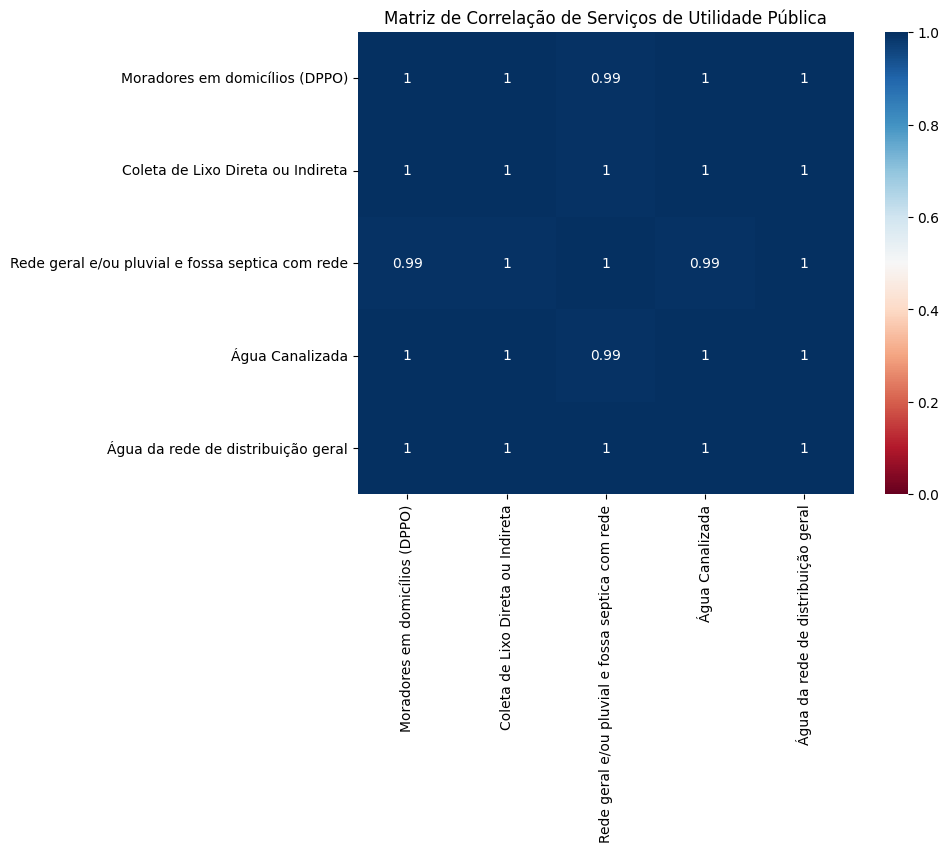

In [75]:
# Matriz de Correlação com Pearson
plt.figure(figsize = (8,6))
plt.title('Matriz de Correlação de Serviços de Utilidade Pública');
sns.heatmap(pearson.corr(), annot=True, cmap='RdBu', vmin=0, vmax=1);

<p align="justify">Pelo gráfico, é possível identificar a alta correlação entre a coberturas de serviços básicos. Dito de outra forma, os municípios com alta cobertura na rede geral de esgotamento sanitário apresenta também alta cobertura na coleta de lixo, abastecimento de água pela rede de distribuição geral e acesso a água canalizada.

<p align="justify">A seguir veremos pelo scatter como está a dispersão desses serviços nas regiões geográficas.


## Gráfico Scatter

In [76]:
#estilo

plt.style.use('ggplot')


In [77]:
# Define as cores por regiao
regioes = sorted(set(df["Regiao"]))
corRegiao = ['#440154', '#414487', '#22a884', '#fde725']

dictCoresRegiao = dict(zip(regioes, corRegiao))

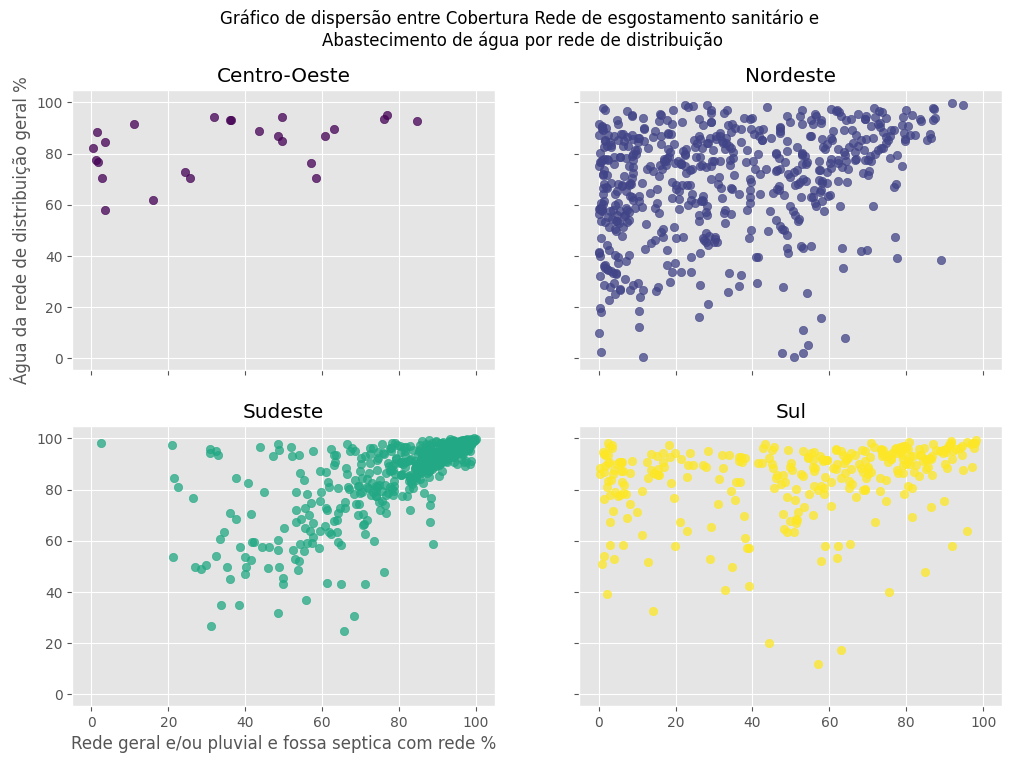

In [78]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8),
                       sharex = True, sharey = True)
axs = ax.flatten()
for i in range(0, 2):
     for j in range(0, 2):
         k = i * 2 + j
         if k < len(regioes):
             regiao = regioes[k]
             dados = df[(df["Regiao"] == regiao)]
             axs[k].scatter(x = dados['Rede geral e/ou pluvial e fossa septica com rede %'],
                               y = dados['Água da rede de distribuição geral %'],
                               color = dictCoresRegiao[regiao],
                               alpha = 0.75,
                               label = regiao)
             axs[k].set_title(regiao)
              #define o rótulo dos eixos
             axs[k].set_visible(True)

axs[2].set(xlabel = "Rede geral e/ou pluvial e fossa septica com rede %")
axs[0].set(ylabel = "Água da rede de distribuição geral %")

#Acrescenta um título a figura (superior a todos os gráficos)
fig.suptitle("Gráfico de dispersão entre Cobertura Rede de esgostamento sanitário e \nAbastecimento de água por rede de distribuição")

plt.show()

<p align="justify"> Por este primeiro gráfico de dispersão verifica-se que quanto maior o percentual de esgotamento sanitário em geral com rede e de abastecimento de água por rede de distribuição, maior a concetração dos pontos.  A região Nordeste apresenta a maior dispersão entre os pontos ocupando parte significativa da área do gráfico.  A regisão Sudeste tem menos dispersão, seguido pela região Sul.  O Centro-Oeste está com esparsos pontos dispersos, sendo necessário um número bem superior de amostras para uma avaliação mais embasada.

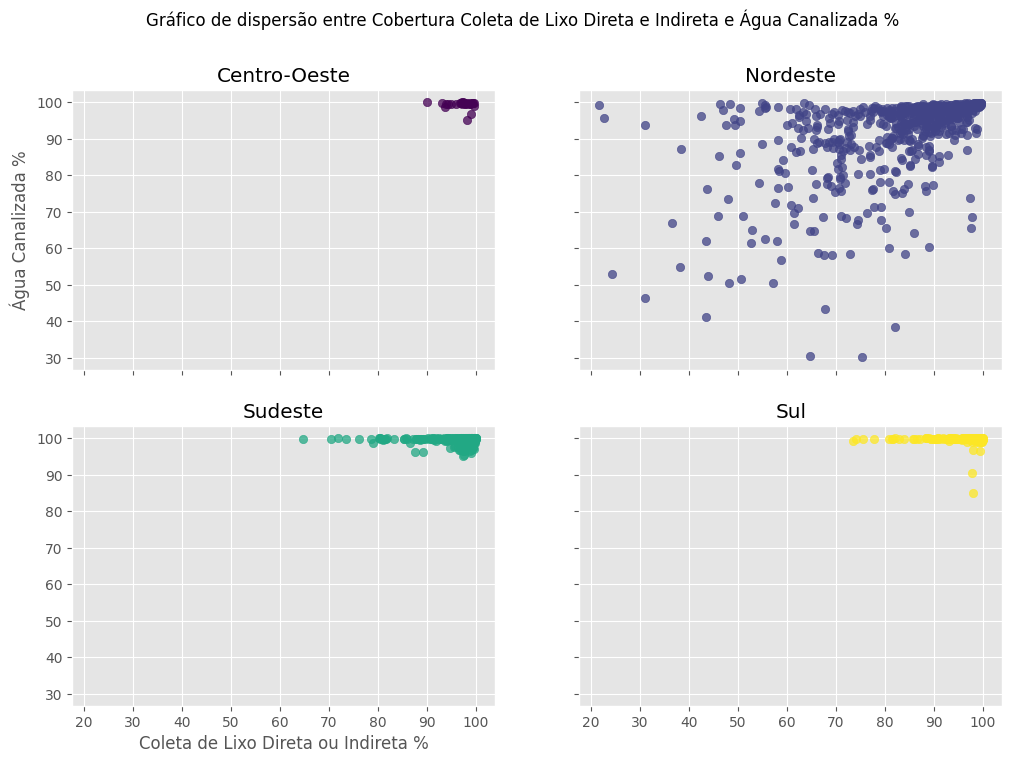

In [79]:
# Gráfico de dispersão entre Coleta de Lixo Direta ou Indireta e Água Canalizada

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8),
                       sharex = True, sharey = True)
axs = ax.flatten()
for i in range(0, 2):
     for j in range(0, 2):
         k = i * 2 + j
         if k < len(regioes):
             regiao = regioes[k]
             dados = df[(df["Regiao"] == regiao)]
             axs[k].scatter(x = dados['Coleta de Lixo Direta ou Indireta %'],
                               y = dados['Água Canalizada %'],
                               color = dictCoresRegiao[regiao],
                               alpha = 0.75,
                               label = regiao)
             axs[k].set_title(regiao)
              #define o rótulo dos eixos
             axs[k].set_visible(True)

axs[2].set(xlabel = "Coleta de Lixo Direta ou Indireta %")
axs[0].set(ylabel = "Água Canalizada %")

#Acrescenta um título a figura (superior a todos os gráficos)
fig.suptitle("Gráfico de dispersão entre Cobertura Coleta de Lixo Direta e Indireta e Água Canalizada %")

plt.show()

<p align = "justify">Nesta segunda comparação entre Coleta de Lixo (eixo X) e Água Canalizada (eixo Y), percebe-se que a dispersão é muito menor para todas as regiões. Entretanto, assim como no primeiro exemplo, a região Nordeste permanece como o lugar com maior divergência nos valores percentuais na cobertura destes serviços.

## Gráfico de linha
Normalmente este gráfico é adotado para representar passagem temporal, mas será utilizada para facilitar comparar diferenças nas percentagens de moradores DPPO que acessam os distintos serviços básicos e essenciais.

In [80]:
# Cores para os distintos serviços

esgotSanitCor = "#2F4F4F"
distrRedeAguaCor = "#0000CD"
aguaCanalizCor = "#8A2BE2"
coletaLixoCor = "#DAA520"

In [81]:
# criando uma database a partir do groupby
# e do aggregate.
# Os dados dos municípios serão agrupados por UF
# E agregados pelas medianas

meduf = df.groupby(["UF"]).aggregate({
    "Moradores em domicílios (DPPO)": "sum",
    "Coleta de Lixo Direta ou Indireta": "sum",
    "Coleta de Lixo Direta ou Indireta %": "median",
    "Rede geral e/ou pluvial e fossa septica com rede": "sum",
    "Rede geral e/ou pluvial e fossa septica com rede %": "median",
    "Água Canalizada": "sum",
    "Água Canalizada %": "median",
    "Água da rede de distribuição geral": "sum",
    "Água da rede de distribuição geral %": "median",
    "Regiao": "first",


}).reset_index()

In [82]:
meduf

,UF,Moradores em domicílios (DPPO),Coleta de Lixo Direta ou Indireta,Coleta de Lixo Direta ou Indireta %,Rede geral e/ou pluvial e fossa septica com rede,Rede geral e/ou pluvial e fossa septica com rede %,Água Canalizada,Água Canalizada %,Água da rede de distribuição geral,Água da rede de distribuição geral %,Regiao
0,AL,2785624,2496596,86.5,983223.0,21.8,2636272.0,95.7,1932899.0,68.1,Nordeste
1,BA,7486730,6923864,89.3,5281208.0,52.4,7365692.0,97.9,6774233.0,85.6,Nordeste
2,CE,6093590,5638198,86.2,2892382.0,20.0,5928254.0,95.7,5025790.0,76.9,Nordeste
3,DF,2792811,2760405,98.8,2365930.0,84.7,2785494.0,99.7,2591636.0,92.8,Centro-Oeste
4,ES,2823958,2724150,95.3,2275164.0,64.2,2818805.0,99.9,2542574.0,82.5,Sudeste
5,GO,3912830,3860341,97.6,2201512.0,33.9,3894410.0,99.7,3436111.0,85.8,Centro-Oeste
6,MA,2539302,2242237,78.5,908528.0,8.8,2480196.0,98.4,1859748.0,77.4,Nordeste
7,MG,12826310,12576969,97.3,11467610.0,83.2,12813025.0,99.9,12062889.0,89.9,Sudeste
8,PB,3021721,2692610,79.1,1509775.0,20.9,2842287.0,89.9,2414481.0,62.6,Nordeste
9,PE,7660281,6821340,81.5,4110460.0,49.6,7126586.0,90.8,5595124.0,66.3,Nordeste


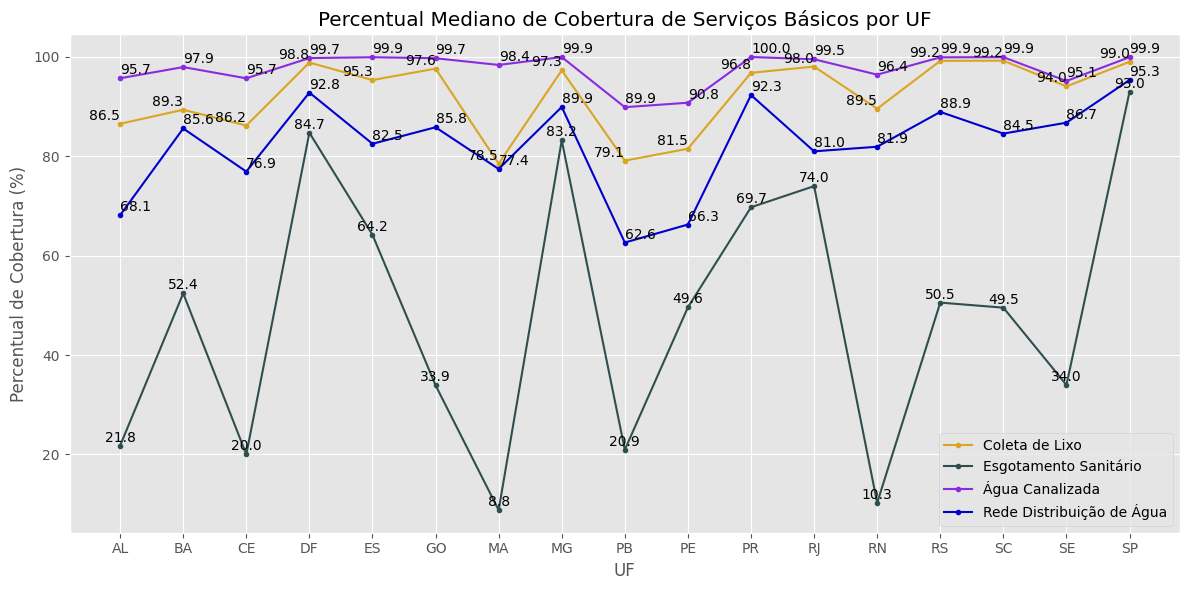

In [99]:
# Gráfico de linha com serviços para comparação utilizando o dataset criado
# na linha de código anterior.

plt.figure(figsize=(12, 6))
plt.plot(meduf['UF'], meduf['Coleta de Lixo Direta ou Indireta %'], marker='.', label='Coleta de Lixo', color=coletaLixoCor)
plt.plot(meduf['UF'], meduf['Rede geral e/ou pluvial e fossa septica com rede %'], marker='.', label='Esgotamento Sanitário', color=esgotSanitCor)
plt.plot(meduf['UF'], meduf['Água Canalizada %'], marker='.', label='Água Canalizada', color=aguaCanalizCor)
plt.plot(meduf['UF'], meduf['Água da rede de distribuição geral %'], marker='.', label='Rede Distribuição de Água', color=distrRedeAguaCor)

# Adicionando valores nos vértices
for x, y in zip(meduf['UF'], meduf['Coleta de Lixo Direta ou Indireta %']):
    plt.annotate(str(round(y, 1)), (x, y), textcoords="offset pixels", xytext=(0, 4), ha='right')

for x, y in zip(meduf['UF'], meduf['Rede geral e/ou pluvial e fossa septica com rede %']):
    plt.annotate(str(round(y, 1)), (x, y), textcoords="offset pixels", xytext=(0, 4), ha='center')

for x, y in zip(meduf['UF'], meduf['Água Canalizada %']):
    plt.annotate(str(round(y, 1)), (x, y), textcoords="offset pixels", xytext=(0, 4), ha='left')

for x, y in zip(meduf['UF'], meduf['Água da rede de distribuição geral %']):
    plt.annotate(str(round(y, 1)), (x, y), textcoords="offset pixels", xytext=(0, 4), ha='left')


plt.xticks(rotation=0)
plt.xlabel('UF')
plt.ylabel('Percentual de Cobertura (%)')
plt.title('Percentual Mediano de Cobertura de Serviços Básicos por UF')
plt.legend()
plt.tight_layout()
plt.show()


<p align="justify">Pelo gráfico de linhas é possível notar que, principalmente, entre o Serviço de Coleta de Lixo e de Água Canalizada existe uma significativa semelhança entre os seus valores percentuais e, os casos onde existem maiores diferenças se concentram nos Estados Nordestinos, sendo o Maranhão o mais proeminente.  Nesta região, apenas Sergipe apresentou semelhança entre a cobertura de serviço de limpeza e de acesso à água canalizada.
<p align="justify"> O esgotamento sanitário com rede foi o tipo de serviço com menor aderência aos valores dos outros serviços, com a exceção de São Paulo, Minas Gerais e o Distrito Federal.  Além disto, este apresentou as maiores diferenças percentuais entre os Estados brasileiros.  Devido a esta condição, em um eventual treino para aprendizagem não supervisionada para predição de percentuais de coberturas de serviços em municipios, não seria adequado utilizar o esgotamento sanitário com rede, a não ser para os Estados mencionados que fogem das características identificas no tipo de esgotamento retratado (SP, MG e DF).
<p align = "justify"> Ainda sobre o esgotamento sanitário chama atenção que os valores estão especialmente baixos para os Estados nordestinos, sendo os piores os Estados do Maranhão e do Rio Grande do Norte.  No gráfico a seguir veremos a mesma informação em gráfico de barras.  

## Gráfico de Barra

In [84]:
# Criando objeto que é a contagem de Estados por Região

ufRegiao = meduf.groupby("Regiao").count()

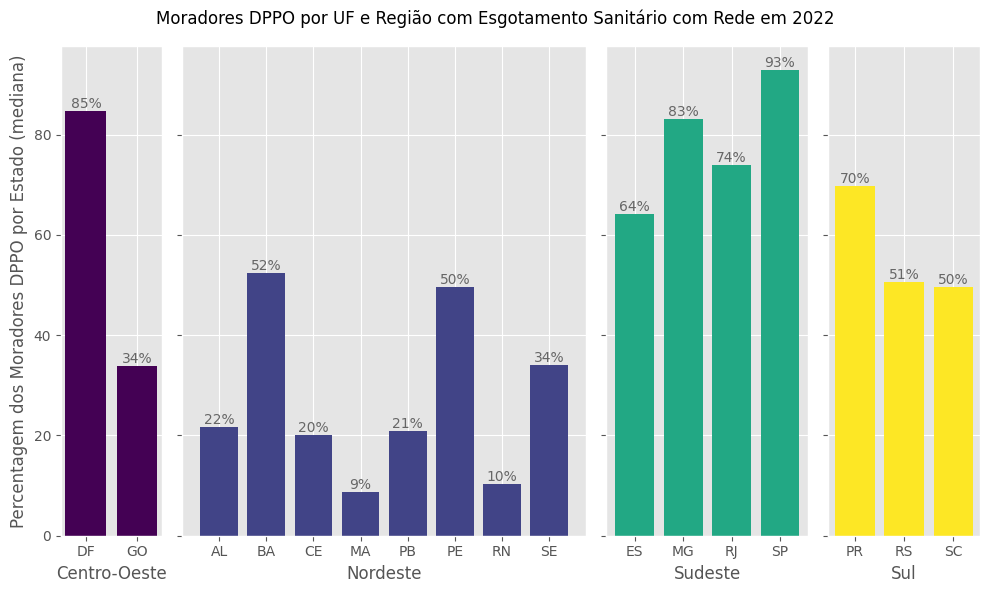

In [85]:
# define base para gráficos.  uma linha para com várias colunas
# ncols = números de colunas necessárias para cada região
# gridspec_km define a largura de cada subplot de acordo com numero de estado em cada região
# sharey compartilha o eixo y (parametro sharey) para permitir a comparação entre diferentes regiões

fig, axs = plt.subplots(nrows = 1, ncols = len(ufRegiao),
                       figsize = (10,6),
                       sharey = 'row',
                       gridspec_kw = {'width_ratios': ufRegiao['UF']})

#define gráfico de barras por região.  Uma região por cada subplot

for i in range(len(ufRegiao)):
  # constroi o gráfico de barra e o label x com a região associada
    axs[i].bar(x = meduf[meduf["Regiao"] == ufRegiao.index[i]]["UF"],
               height = meduf[meduf["Regiao"] == ufRegiao.index[i]]["Rede geral e/ou pluvial e fossa septica com rede %"],
               color = corRegiao[i])

    #Exibe valores sobre cada barra
    axs[i].bar_label(axs[i].containers[0], fmt="%.0f%%", color = "#666666")


    # define o rótulo do eixo x de cada subplot com a a região associada
    axs[i].set(xlabel = ufRegiao.index[i])


# plot o eixo y só primeiro eixo
# por ser compartilhado com todos os gráficos da linha
axs[0].set(ylabel = "Percentagem dos Moradores DPPO por Estado (mediana)")

#define o mesmo titulo para todos os gráficos
fig.suptitle("Moradores DPPO por UF e Região com Esgotamento Sanitário com Rede em 2022")

plt.tight_layout()
plt.show()

É possível perceber que, pela mediana, a maioria dos Estados, incluso a de Região Sul, têm predomínio de municícipios com apenas um pouco a mais de 50% de Moradores DPPO com esgotamento sanitário ligado à rede.

Estes gráficos foram elaborados em cima de valores percentuais, pois a distribuição da população no país é extremamente desigual, o que consequentemente "distorceria" a visualização dos dados e prejudicaria na análise, mas a seguir será apresentado o total de moradores em domicílios DPPO por cada Estado.

In [86]:
# Somar a população de cada UF e ordenar

populacao_uf = df.groupby('UF')['Moradores em domicílios (DPPO)'].sum().sort_values(ascending=False)

print(populacao_uf)

UF
SP    40526099
RJ    15602414
MG    12826310
PR     8235284
PE     7660281
RS     7516570
BA     7486730
SC     6101997
CE     6093590
GO     3912830
PB     3021721
ES     2823958
DF     2792811
AL     2785624
MA     2539302
RN     2259489
SE     1776908
Name: Moradores em domicílios (DPPO), dtype: int64


## Valores mínimos e máximos de percentuais de moradores DPPO por município

In [ ]:
# Para cada serviço, encontrar o município com o valor mínimo e máximo

for column in ['Coleta de Lixo Direta ou Indireta %', 'Rede geral e/ou pluvial e fossa septica com rede %',
               'Água da rede de distribuição geral %', 'Água Canalizada %']:
  min_value = df[column].min()
  max_value = df[column].max()

  # Encontrar o município com o valor mínimo e máximo
  min_municipio = df.loc[df[column] == min_value, 'Nome'].values[0]
  max_municipio = df.loc[df[column] == max_value, 'Nome'].values[0]

  print(f"Serviço: {column}")
  print(f"Mínimo: {min_value:.2f}% em {min_municipio}")
  print(f"Máximo: {max_value:.2f}% em {max_municipio}")
  print("---")

Serviço: Coleta de Lixo Direta ou Indireta %
Mínimo: 21.54% em Sobrado - PB
Máximo: 100.00% em Águas de São Pedro - SP
---
Serviço: Rede geral e/ou pluvial e fossa septica com rede %
Mínimo: 0.00% em Riachão do Poço - PB
Máximo: 99.95% em São Caetano do Sul - SP
---
Serviço: Água da rede de distribuição geral %
Mínimo: 0.42% em Baraúna - PB
Máximo: 100.00% em Águas de São Pedro - SP
---
Serviço: Água Canalizada %
Mínimo: 30.25% em Poção - PE
Máximo: 100.00% em Divino - MG
---


<p align="justify">Neste resumo entre os valores mínimos e máximos entre os municípios, percebe-se que os valores máximos estão nos Estados da região sudeste (SP, MG), e os valores mínimos estão nos Estados nordestinos (PB, PE).

# Encerramento: considerações e reflexões

<p align="justify">Percebe-se que existe sim uma certa aderência entre os valores percentuais de pessoas atendidas pelos serviços básicos e essenciais.  No entanto percebe-se que nos Estados Nordestinos, a similiradade no número de pessoas que os acessam diminue e varia muito, especialmente para esgotamento sanitário com rede.  Ainda sobre este, percebe-se que o país precisa ampliar muito a abrangência de moradores em DPPO que tem acesso a rede de esgotamento sanitário.  
<p align="justify">O Estado de São Paulo foi o lugar onde mais apresentou os municípios com as melhroes coberturas, sendo que a Águas de São Pedro aparece duas vezes, em Água da rede de distribuição geral % e em Coleta de Lixo Direta ou Indireta %.  Para uma empreendedor que busca uma cidade com uma boa infraestrutura e serviços básicos distribuidos de forma equanime para a população, este Estado é uma escolha interessante.
<p align="justify">A realidade inversa ocorre nos três municípios provenientes do mesmo Estado, Paraíba, que têm o menor percentual de sua população atendida por serviços básicos.  Este problema também é identificado nos gráficos de barra e de linha para toda a região Nordestina.  É possível concluir, portanto, que o Nordeste precisa de políticas públicas mais eficientes e justas, para que os seus respectivos moradores tenham uma condição de vida melhor.
<p align="justify">A etapa do pré-processamento consistiu na identificação e substituição de valores nulos por mediana ou zero, acrescimo e exclusão de colunas e mudança dos nomes de colunas para melhorar a legibilidade.